**CONFRONTO ALGORITMI DI INTERPOLAZIONE POLINOMIALE**

Sono stati implementati i seguenti algoritmi:
- Interpolazione mediante formula baricentrica di Lagrange
- Interpolazione mediante formula di Newton alle differenze divise
- Formula di Chebyshev per il calcolo dei nodi


In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def epsilon_machine():
    eps = 1.0
    while eps + 1 > 1:
        eps/=2
    eps *= 2
    
    return eps

In [54]:
def coefficienti_indeterminati(xn: np.ndarray, yn: np.ndarray, x):
    n = len(xn)
    p = np.zeros(len(x))

    # costruzione della matrice di Vandermonden
    A = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            A[i, j] = np.power(xn[i], j)

    # calcoliamo i coefficienti indeterminati
    c = soluzione_gauss(A, yn)

    for i in range(len(x)):
        for n in range(len(c)):
            p[i] += c[n] * (np.power(x[i], n))

    return p

In [55]:
def z_coefficiente(xn: np.ndarray, yn: np.ndarray) -> np.ndarray:
    n: int = len(xn)
    X: np.ndarray = np.eye(n)

    for i in range(n):
        for j in range(n):
            if j > i:
                X[i, j] = xn[i] - xn[j]
            elif j < i:
                X[i, j] = - X[j, i]
    zn: np.ndarray = np.zeros(n)
    for j in range(n):
        zn[j] = yn[j] / np.prod(X[j, :])

    return zn

In [56]:
def calcola_Lagrange(x: float, xn: np.ndarray, yn: np.ndarray, zn: np.ndarray) -> float:
    trova_nodi = abs(x - xn) < epsilon_machine()

    if True in trova_nodi:
        temp = np.flatnonzero(trova_nodi == True)
        j = temp[0]
        pn = yn[j]
    else:
        n = len(xn)
        S = 0
        for j in range(n):
            S = S + zn[j] / (x - xn[j])
        pn = np.prod(x - xn) * S

    return pn


In [57]:
def metodo_Lagrange(xn: np.ndarray, yn: np.ndarray, x: np.ndarray) -> np.ndarray:
    len_x: int = len(x)

    # Calcolo i coefficienti formula baricentrica
    zn: np.ndarray = z_coefficiente(xn, yn)

    # calcolo polinomio interpolazione nei punti di x
    p = np.zeros(len_x)
    for i in range(len_x):
        p[i] = calcola_Lagrange(x[i], xn, yn, zn)

    return p

In [58]:
def differenze_finite(xn: np.ndarray, yn: np.ndarray) -> np.ndarray:
    d: np.ndarray = np.copy(yn)
    n: int = len(yn)

    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            d[i] = (d[i] - d[i - 1]) / (xn[i] - xn[i - j])

    return d


In [59]:
def calcola_Newton(x: float, xn: np.ndarray, d: np.ndarray) -> float:
    n: int = len(xn) - 1
    p: float = d[n]

    for i in range(n - 1, -1, -1):
        p = d[i] + p * (x - xn[i])

    return p

In [60]:
def metodo_Newton(xn: np.ndarray, yn: np.ndarray, x: np.ndarray) -> np.ndarray:
    len_x: int = len(x)
    d: np.ndarray = differenze_finite(xn, yn)
    p: np.ndarray = np.zeros(len_x)

    for i in range(len_x):
        p[i] = calcola_Newton(x[i], xn, d)

    return p


In [61]:
def nodi_Chebyshev(a: float, b: float, n: int) -> np.ndarray:
    x = np.empty(n)
    for i in range(n):
        x[i] = a + (np.cos((2*i+1)/(2*n+2)*np.pi) + 1) * (b-a)/2
    return x


In [62]:
def testInterpolazione(a: float, b: float, n: int, nx: int, fun: type('function')):
    # Grado ed i nodi di interpolazione
    xn: np.ndarray = np.linspace(a, b, n + 1)
    yn: np.ndarray = fun(xn)

    # Creazione dell'insieme delle x su cui testare il polinomio di interpolazione
    x: np.ndarray = np.linspace(a, b, nx)

    # Calcolo della funzione per ogni xi in x
    fx: np.ndarray = fun(x)

    # Calcolo delle x con i polinomi di interpolazione (Lagrange, Newton)
    px_lagrange: np.ndarray = metodo_Lagrange(xn, yn, x)
    px_newton: np.ndarray = metodo_Newton(xn, yn, x)

    plt.plot(1)
    plt.plot(x, px_lagrange, color='orange', label='Lagrange')
    plt.plot(x, px_newton, color='blue', label='Newton')
    plt.plot(x, fx, 'k--', label='f(x) = cos(x)')
    plt.plot(xn, yn, 'ro')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    plt.plot(2)
    plt.plot(x, abs(fx - px_lagrange), "red", label='|f(x) - Pn_Lagrange(x)|')
    plt.plot(x, abs(fx - px_newton), "green", label='|f(x) - Pn_Newton(x)|')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [66]:
def test_nodi(a: float, b: float, nx: int, nmax: int, fun: type('function')):
    x = np.linspace(a, b, nx)
    fx = fun(x)

    resto_eq_lagrange = np.zeros(nmax)
    resto_ch_lagrange = np.zeros(nmax)

    resto_eq_newton = np.zeros(nmax)
    resto_ch_newton = np.zeros(nmax)

    for n in range(nmax):
        xn_eq = np.linspace(a, b, n + 1)
        yn_eq = fun(xn_eq)

        px_eq_lagrange = metodo_Lagrange(xn_eq, yn_eq, x)
        px_eq_newton = metodo_Newton(xn_eq, yn_eq, x)

        xn_ch = nodi_Chebyshev(a, b, n + 1)
        yn_ch = fun(xn_ch)

        px_ch_lagrange = metodo_Lagrange(xn_ch, yn_ch, x)
        px_ch_newton = metodo_Newton(xn_ch, yn_ch, x)

        resto_eq_lagrange[n] = max(abs(fx - px_eq_lagrange))
        resto_ch_lagrange[n] = max(abs(fx - px_ch_lagrange))

        resto_eq_newton[n] = max(abs(fx - px_eq_newton))
        resto_ch_newton[n] = max(abs(fx - px_ch_newton))

    plt.figure(3)
    plt.semilogy(range(nmax), resto_eq_lagrange, "red", label="MAX RESTO NODI EQUILIBRATI (Lagrange)")
    plt.semilogy(range(nmax), resto_ch_lagrange, "green", label="MAX RESTO NODI DI CHEBISHEV (Lagrange)")

    plt.semilogy(range(nmax), resto_eq_newton, "orange", label="MAX RESTO NODI EQUILIBRATI (Newton)")
    plt.semilogy(range(nmax), resto_ch_newton, "lightblue", label="MAX RESTO NODI DI CHEBISHEV (Newton)")

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


**CONFRONTO IN BASE AL TEMPO DI ESECUZIONE**

La funzione usata per il test dei metodi di interpolazione è **f(x) = cos(x)**, l'intervallo in cui viene calcolata è [-2pi, 2pi] e il grado del polinomio di interpolazione è 60.

Il confronto viene fatto tra due polinomi:
1. I polinomi di grado 60,  prodotto dalla Formula di Lagrange
2. Il polinomio di grado 60, prodotto dalla Formula di Newton

Da quanto osservabile si evince dal primo grafico l'interpolazione della funzione f(x) è praticamente la stessa per i due metodi 
E' possibile però nel secondo grafico un errore lievemente maggiore per il polinomio di Newton rispetto a quello di Lagrange

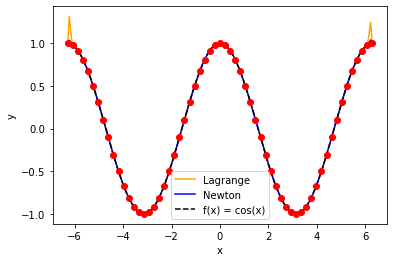

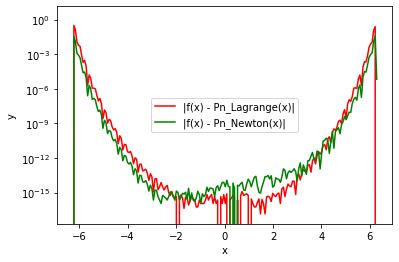

In [64]:
testInterpolazione(-2 * np.pi, 2 * np.pi, 60, 200, np.cos)

**CONFRONTO TRA NODI EQUIDISTANTI E NODI CHEBYSHEV**

In questo caso è stata usata come funzione di test dei metodi di interpolazione **f(x) = cos(x)**.
La funzione viene calcolata nell'intervallo [-2pi, 2pi] e il grado del polinomio di interpolazione è 60

Il confronto viene fatto tra quattro polinomi, di grado 60, prodotti dalle seguenti formule:
- Formula baricentrica di Lagrange e nodi EQUIDISTANTI
- Formula  baricentrica di Lagrange e nodi di CHEBYSHEV
- Formula di Newton e nodi EQUIDISTANTI
- Formula di Newton e nodi di CHEBYSHEV

Dai seguenti grafici possiamo notare come il resto del polinomio di interpolazione tende a crescere all'aumentare del grado.
Un resto minore lo troviamo nei polinomi in cui i nodi sono stati prodotti dalla formula di Chebyshev con entrambe le formule.

In particolare, nei grafici notiamo che il resto minore lo ritroviamo nel polinomio prodotto dalla Formula di Lagrange con nodi di Chebyshev, tra l'altro i polinomi prodotti con la formula baricentrica di Lagrange tendono ad avere sempre un errore minore rispetto a quelli prodotti con la formula di Newton




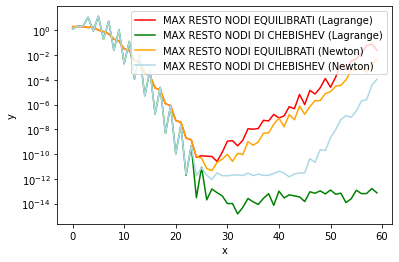

In [67]:
test_nodi(-2 * np.pi, 2 * np.pi, 200, 60, np.cos)